# The "Right Stuff"

Author: **Makenzi Fischbach and Trevor Zou**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [2]:
%load_ext autoreload
%autoreload 2

import obtain as o
import functions as f

## Introduction

What is the "right stuff"? The right stuff is a term coined by author Tom Wolfe to represent the qualities possessed by NASA astronauts that make them deemed fit for the job. For our project, we wanted to look at how this concept of the right stuff has evolved over the past sixty years. We accomplished this through a detailed analysis of various astronaut characteristics. We focused most heavily on education, military involvement, gender, and age. 

The first group of NASA astronauts, the Mercury Seven, consisted entirely of male, military test pilots. The astronaut program, as well as NASA itself, was introduced in response to the growing tension between the US and the Soviet Union during the Cold War. Pilots were recruited since they are the most equipped to deal with risk and already had an abundance of flight experience. 

Modern astronauts look fairly different due to the shift away from the politically driven actions  of the space race and towards the motive of scientific exploration. In fact, it wasn’t until Apollo 17 when the first civilian astronaut, geologist Jack Schmitt, was sent to space. 

![title](class21.png)

## Method

### Getting the data

We retrieved our data by using the kaggle API’s dataset download feature. We downloaded a zip file containing “The NASA Astronaut Yearbook” 2013 edition, which has information on astronauts ranging from the first astronaut selection class to the twentieth. We then used the zip module to unzip the file, and cleaned up the data by changing the birth date and adding a selection age column. Note some interesting features in the data, such as the NaN’s in the group column, which are indicative that the person was not a part of the standard astronaut application process and was typically a member of the research community or “payload specialist” funded by a payload sponsor.

In [3]:
nasa_astronaut_dataset = o.get_data() #retrieve data

nasa_astronaut_dataset.head() #print section of dataframe

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


Table 1. A four row excerpt of our pandas dataframe

In [4]:
nasa_astronaut_dataset = f.change_dates(nasa_astronaut_dataset) #add columns

nasa_astronaut_dataset["State"] = nasa_astronaut_dataset["Birth Place"].str[-2:] #add state column

nasa_astronaut_dataset[["Name", "Year", "Birth Date", "Selection Age"]] #print new columns

,Name,Year,Birth Date,Selection Age
0,Joseph M. Acaba,2004.0,1967.0,37.0
1,Loren W. Acton,NaN,1936.0,NaN
2,James C. Adamson,1984.0,1946.0,38.0
3,Thomas D. Akers,1987.0,1951.0,36.0
4,Buzz Aldrin,1963.0,1930.0,33.0
...,...,...,...,...
352,David A. Wolf,1990.0,1956.0,34.0
353,Neil W. Woodward III,1998.0,1962.0,36.0
354,Alfred M. Worden,1966.0,1932.0,34.0
355,John W. Young,1962.0,1930.0,32.0


Table 2: A sample table of the three columns we added to the dataframe using Pandas: "Year", "Birth Date", and "Selection Age". 

## Results
Through the analysis and visualization of our data (using Matplotlib), we were able to find various trends which demonstrate this change of the "right stuff". First, we created a graph that shows the number of astronauts selected per year.  

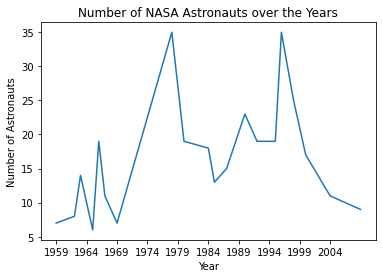

In [9]:
f.plot_astronauts_vs_time(nasa_astronaut_dataset)

Fig 1. a graph of the number of astronauts selected over the years

The first large spike around 1969 is due to the large increase in support and funding for the space program following the success of the Apollo 11 mission. The second large spike is due to the start of the shuttle program resulting in an increase in the demand for astronauts.

In order to obtain a better understanding of the distribution of astronauts in regards to gender and military affiliation, we created a bar graph which shows the total gender distribution of astronauts and also shows what amount of these astronauts had military involvement.  

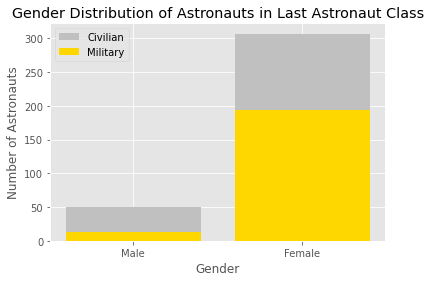

In [5]:
f.gender_military(nasa_astronaut_dataset, ["Male", "Female"],"Gender Distribution of Astronauts in Last Astronaut Class" )

Fig 2. a bar chart showing the gender divide of astronauts as well as general military affiliation

It is clear from looking at this graph that females astronauts are still in the minority and that the minority of astronauts are civilians. Both of these trends are examined in more detail later in this essay.

### Education & Military

Next, we looked at general trends in education, to see how the education of selected astronauts has evolved over the years. 

Below is a list of the most common university ("Alma Mater" column) attended per astronaut selection group. 

In [7]:
f.top_college_over_time(nasa_astronaut_dataset)

['US Naval Academy',
 'US Military Academy',
 'US Military Academy',
 'California Institute of Technology',
 'US Naval Postgraduate School',
 'MIT',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Naval Academy',
 'MIT',
 'Embry-Riddle Aeronautical University',
 'University of California-Santa Barbara',
 'Stanford University']

The US Naval Academy produces the most astronauts, and this may be due to the fact that many astronauts have been Navy pilots. The most common non-military institution is MIT. Military institutions, such as the US Naval Academy, have consistently produced the most astronauts over the years. The lack of a military institutions within the last 4 groups shows a shift away from military-centric education towards wherever the highest quality of general education is, whether or not it is from a military institution.


Next, we created a horizontal bar graph showing common majors and how many astronauts majored in that topic. We also computed what percentage of astronauts have majored in some form of engineering.

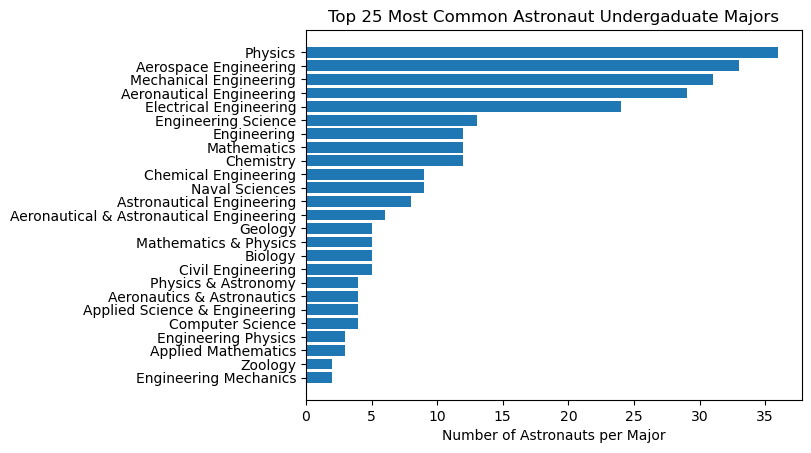

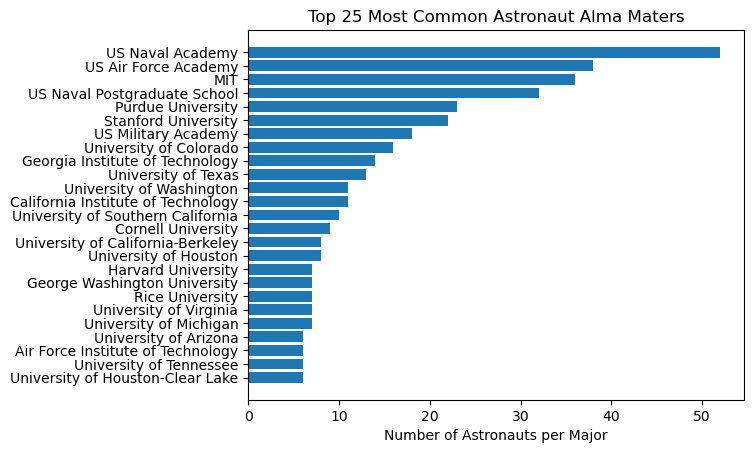

In [5]:
f.horizontal_bar(nasa_astronaut_dataset,8, "Undergaduate Majors")
f.horizontal_bar(nasa_astronaut_dataset,7, "Alma Maters")

Fig 3. a horizontal bar graph of the most common majors of astronauts

In [28]:
f.engineer(nasa_astronaut_dataset)

36.144578313253014 % of Astronauts majored in some kind of Engineering


The most common undergraduate major is physics, followed closely by engineering. We also found that 36 percent of astronauts majored in some form of engineering. We can therefore see that experience in STEM fields are the most beneficial for an applicant to have in order to be selected as an astronaut. 

**Author's Note: look into why physics is not #1 on this graph**

If we look deeper into the data to see how it evolves over time, we see that military education has always been an integral factor. We continued to investigate this split between military and cilivian astronauts and created a scatter plot showing the military education of astronuts per selection group. 

/home/softdes/SofDes_Midterm_Erhardt1/functions.py:450: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(group, military_affiliation, color='red',


AttributeError: 'Line2D' object has no property 'sslabel'

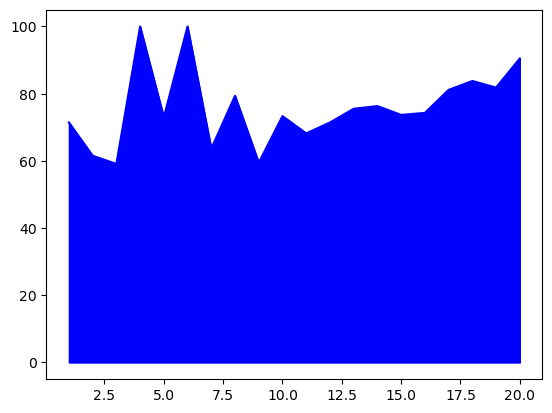

In [9]:
f.military_college_over_time(nasa_astronaut_dataset)

Fig 4. a scatter plot of military education per astronaut selection group

The trend of the graph shows that the amount of military education in astronauts is increasing. However, this is due to an increased emphasis on the education of astronauts rather than the militaristic aspect. It is important to note that this graph does not take payload specialists into consideration. 

Finally, we created pie charts to look into how many astronauts have gone to graduate school per decade. 

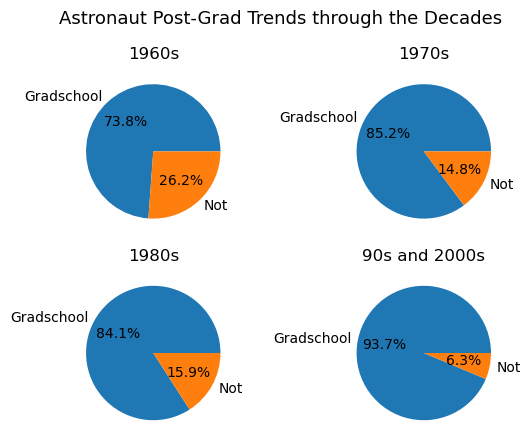

In [22]:
f.grad_school_over_time(nasa_astronaut_dataset)

Fig 5. pie charts depicting the percentage of astronauts attending graduate school per decade

These pie charts demonstrate an emphasis on education over military experience. From 73.8% attending grade school to 93.7%, this shows the increased importance of education in the astronaut selection process. Based on the data from the most recent included decade, it would be nearly impossible to be selected as an astronaut without some form of graduate degree.

### Gender

Next, we looked at trends regarding the gender of NASA astronauts. 

Our first graph shows what percentage of each selection group consisted of female astronauts. 

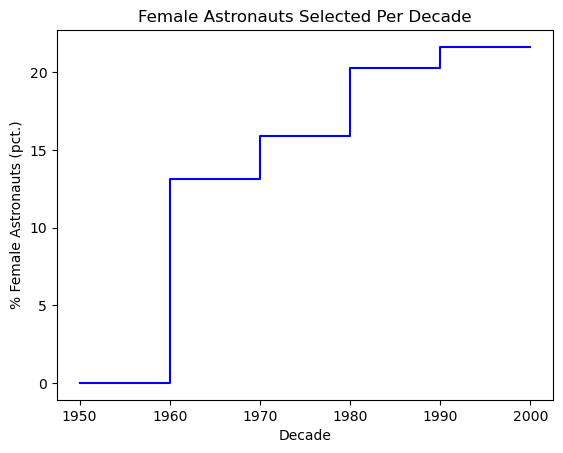

In [24]:
f.female_astronauts_decade(nasa_astronaut_dataset)

Fig 6. a step graph showing what percentage of each astronaut selection group was female 

There is a clear upward trend from zero percent to about 20 percent. The first jump in percentage, between 1960 and 1970, can partially be attributed to NASA’s first female astronaut to go to space, Sally Ride.

To get a better understanding of female representation amongst NASA astronauts, we created a line chart on the total astronauts selected per selection group (purple) against the total number of female astronauts per group (pink).

20 20 20


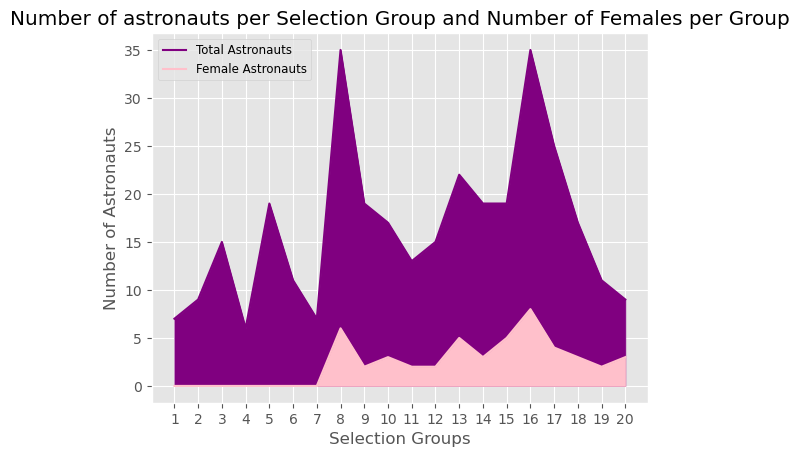

In [26]:
f.female_and_total(nasa_astronaut_dataset)

Fig 7. a line chart showing total astronauts per selection group and female astronauts per selection group

This graph shows that while there are strides towards gender inclusion, being an astronaut is still a largely male dominated occupation

We ploted more bar charts, based on figure 2, to show the gender & military distribution of astronauts from the first astronaut class in 1959 against the twentieth astronaut class in 2009. 

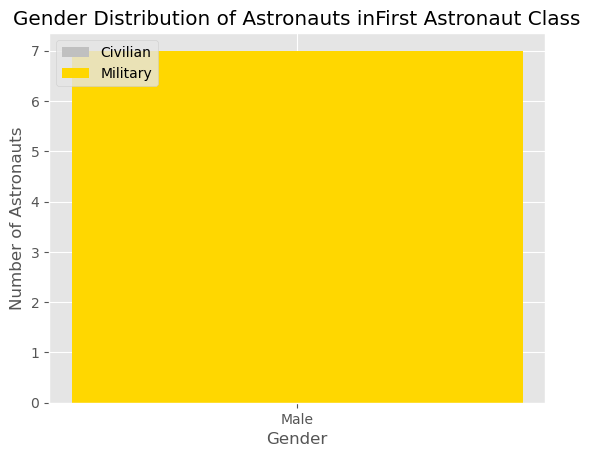

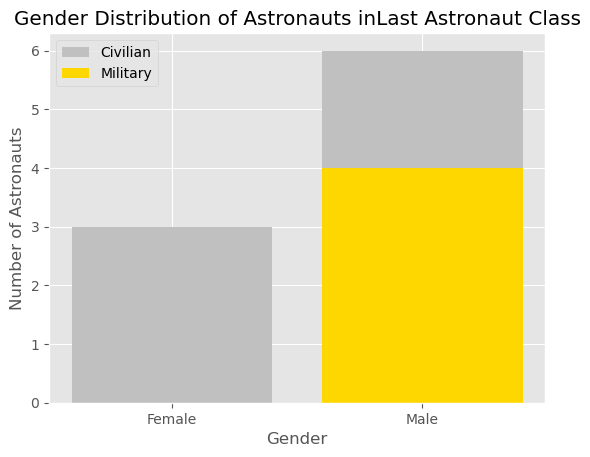

In [25]:
f.first_v_last(nasa_astronaut_dataset)

Fig 8. two bar charts showing the gender and military affiliations of astronauts in the first selection group and the twentieth selection group

There is a clear trend towards an increase in female astronauts as well as an increased emphasis on education shown through the increase in civilian astronauts. This again shows a shift away from military dominance as well as towards gender inclusivity. 

### Age

Lastly, we created a line graph to see if there were any trends regarding the age of selected astronauts.

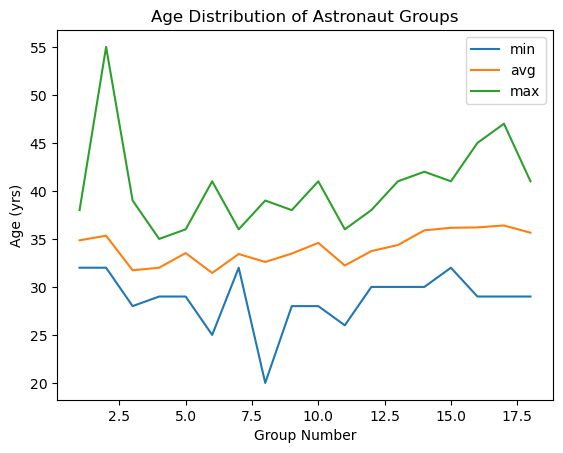

In [23]:
f.age_vs_group(nasa_astronaut_dataset)

Fig 9. a line chart showing the minimum, maximum, and average age of astronauts per selection group

We see that the average age of astronauts goes up slightly, while the maximum age goes up alot, showing less focus on physical factors, more inclusion, and more time devoted to education.

## Conclusion

Our analysis could be improved by figuring a way to incorporate civilian astronauts not belonging to a selection group, such as payload specialists

Through the analysis of our data, we found several trends which show the ways in which “the right stuff” has changed. We saw a fluctuation in the number of astronauts selected. There is a gradual shift away from military experience toward education as NASA’s motive focused more on exploration and knowledge. We see a trend towards a more equal astronaut selection in regards to gender. There is also evidence of a slight increase in age. The meaning of the right stuff has changed. Hopefully it will continue to evolve and take more strides towards inclusivity and knowledge. 
